In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

## Load data

In [2]:
df=pd.read_csv("Downloads/pokemon_alopez247.csv")
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


## data cleaning

In [4]:
print(df.isnull().any())

Number              False
Name                False
Type_1              False
Type_2               True
Total               False
HP                  False
Attack              False
Defense             False
Sp_Atk              False
Sp_Def              False
Speed               False
Generation          False
isLegendary         False
Color               False
hasGender           False
Pr_Male              True
Egg_Group_1         False
Egg_Group_2          True
hasMegaEvolution    False
Height_m            False
Weight_kg           False
Catch_Rate          False
Body_Style          False
dtype: bool


In [5]:
print(df.isnull().sum())

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64


### drop column with too much N/A

In [6]:
drop_column_name = ['Type_2', 'Egg_Group_2']
clean_df = df.drop(columns=drop_column_name)
clean_df

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,...,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,...,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,...,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,...,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,...,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed
5,6,Charizard,Fire,534,78,84,78,109,85,100,...,False,Red,True,0.875,Monster,True,1.70,90.5,45,bipedal_tailed
6,7,Squirtle,Water,314,44,48,65,50,64,43,...,False,Blue,True,0.875,Monster,False,0.51,9.0,45,bipedal_tailed
7,8,Wartortle,Water,405,59,63,80,65,80,58,...,False,Blue,True,0.875,Monster,False,0.99,22.5,45,bipedal_tailed
8,9,Blastoise,Water,530,79,83,100,85,105,78,...,False,Blue,True,0.875,Monster,True,1.60,85.5,45,bipedal_tailed
9,10,Caterpie,Bug,195,45,30,35,20,20,45,...,False,Green,True,0.500,Bug,False,0.30,2.9,255,insectoid


### fill N/A with mean

In [7]:
clean_df.Pr_Male.fillna(clean_df.Pr_Male.mean(), inplace=True)

In [8]:
print(clean_df.isnull().any())
np.any(clean_df.isnull()) == True

Number              False
Name                False
Type_1              False
Total               False
HP                  False
Attack              False
Defense             False
Sp_Atk              False
Sp_Def              False
Speed               False
Generation          False
isLegendary         False
Color               False
hasGender           False
Pr_Male             False
Egg_Group_1         False
hasMegaEvolution    False
Height_m            False
Weight_kg           False
Catch_Rate          False
Body_Style          False
dtype: bool


False

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 21 columns):
Number              721 non-null int64
Name                721 non-null object
Type_1              721 non-null object
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
Generation          721 non-null int64
isLegendary         721 non-null bool
Color               721 non-null object
hasGender           721 non-null bool
Pr_Male             721 non-null float64
Egg_Group_1         721 non-null object
hasMegaEvolution    721 non-null bool
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
Body_Style          721 non-null object
dtypes: bool(3), float64(3), int64(10), object(5)
memory usage: 103.

### check outlier

Text(0.5,1,'Defense')

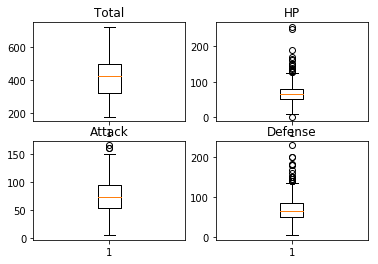

In [10]:
import matplotlib.pyplot as plt
from matplotlib import pyplot


%matplotlib inline

plt.subplot(2,2,1)
pyplot.boxplot([clean_df.Total])
pyplot.title('Total')

plt.subplot(2,2,2)
pyplot.boxplot([clean_df.HP])
pyplot.title('HP')
# pyplot.show

plt.subplot(2,2,3)
pyplot.boxplot([clean_df.Attack])
pyplot.title('Attack')

plt.subplot(2,2,4)
pyplot.boxplot([clean_df.Defense])
pyplot.title('Defense')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
Number              721 non-null int64
Name                721 non-null object
Type_1              721 non-null object
Type_2              350 non-null object
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
Generation          721 non-null int64
isLegendary         721 non-null bool
Color               721 non-null object
hasGender           721 non-null bool
Pr_Male             644 non-null float64
Egg_Group_1         721 non-null object
Egg_Group_2         191 non-null object
hasMegaEvolution    721 non-null bool
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
Body_Style          721 non-

### data summary and distribution

Beside hasMegaEvolution, Body_Style, Name, Type others are all numerical and continuous data, so, we will try to understand
them with the assistance of Density Plots. All these plots are shown in below. Though, of course, the
range of they variables are distinct, all the shapes are similar. More or less, all the distributions seem to be
gaussian. 

In [12]:
clean_df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.188974,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.553377,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


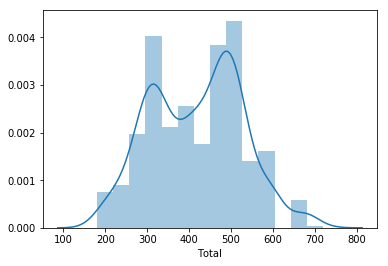

In [13]:
x = clean_df['Total']
sns.distplot(x);

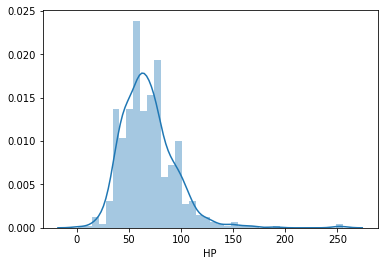

In [14]:
x = clean_df['HP']
sns.distplot(x);

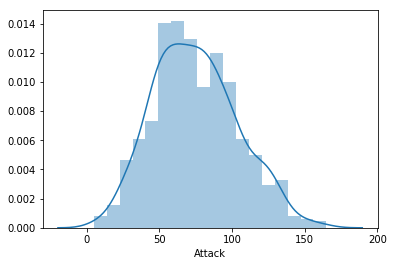

In [15]:
x = clean_df['Attack']
sns.distplot(x);

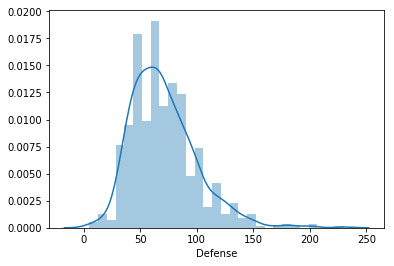

In [16]:
x = clean_df['Defense']
sns.distplot(x);

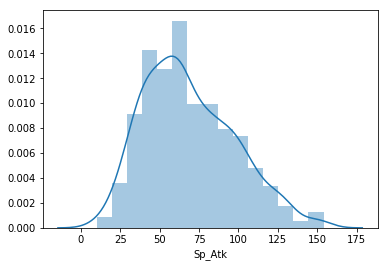

In [17]:
x = clean_df['Sp_Atk']
sns.distplot(x);

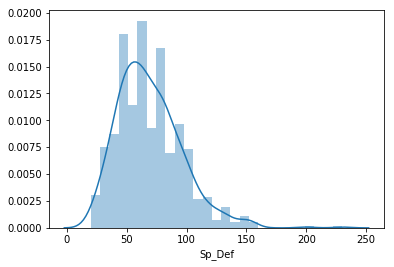

In [18]:
x = clean_df['Sp_Def']
sns.distplot(x);

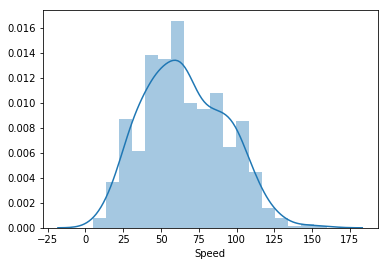

In [19]:
x = clean_df['Speed']
sns.distplot(x);

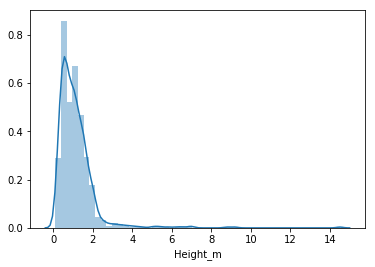

In [20]:
x = clean_df['Height_m']
sns.distplot(x);

### correlation

In [21]:
clean_df.corr()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
Number,1.000000,0.160370,0.107512,0.138104,0.121401,0.120161,0.111822,0.028156,0.983329,0.135022,-1.003276e-01,-1.272272e-02,-0.117981,-0.009710,0.087309,-0.074931
Total,0.160370,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.092868,0.481837,-3.859781e-01,9.656737e-02,0.228503,0.526813,0.535966,-0.738280
HP,0.107512,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.071545,0.258926,-1.550311e-01,-6.201112e-02,0.093708,0.442872,0.431320,-0.478725
Attack,0.138104,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.093857,0.302786,-1.968920e-01,1.958037e-01,0.203840,0.408590,0.469395,-0.525106
Defense,0.121401,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.068409,0.274446,-2.694657e-01,5.813273e-02,0.122666,0.354205,0.476983,-0.436558
Sp_Atk,0.120161,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.069689,0.409739,-3.365793e-01,9.151992e-02,0.175581,0.330579,0.285048,-0.539114
Sp_Def,0.111822,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.055421,0.360215,-3.372646e-01,1.563309e-02,0.149796,0.313196,0.328645,-0.513014
Speed,0.028156,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.003920,0.286082,-2.169640e-01,6.442717e-02,0.147844,0.224617,0.108637,-0.410557
Generation,0.983329,0.092868,0.071545,0.093857,0.068409,0.069689,0.055421,0.003920,1.000000,0.071875,-2.991561e-02,1.038562e-02,-0.125374,-0.051304,0.034003,-0.025227
isLegendary,0.135022,0.481837,0.258926,0.302786,0.274446,0.409739,0.360215,0.286082,0.071875,1.000000,-6.447140e-01,3.545304e-02,0.047955,0.326323,0.425219,-0.319302


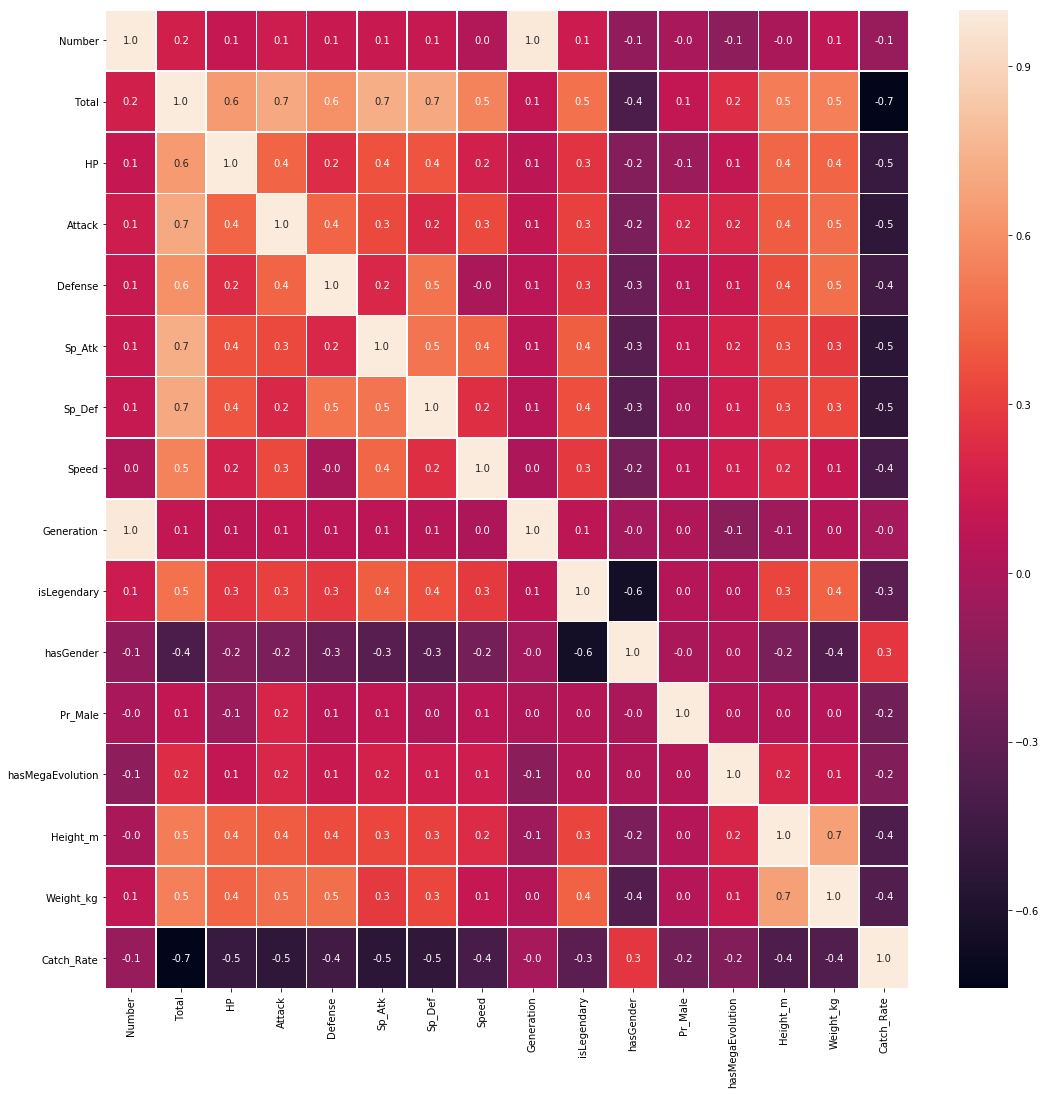

In [22]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(clean_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#### According to the heat map, total have strong correlation with Sp_Atk, Sp_Def and Attack. And Height_m have strong correlation with Weight_kg

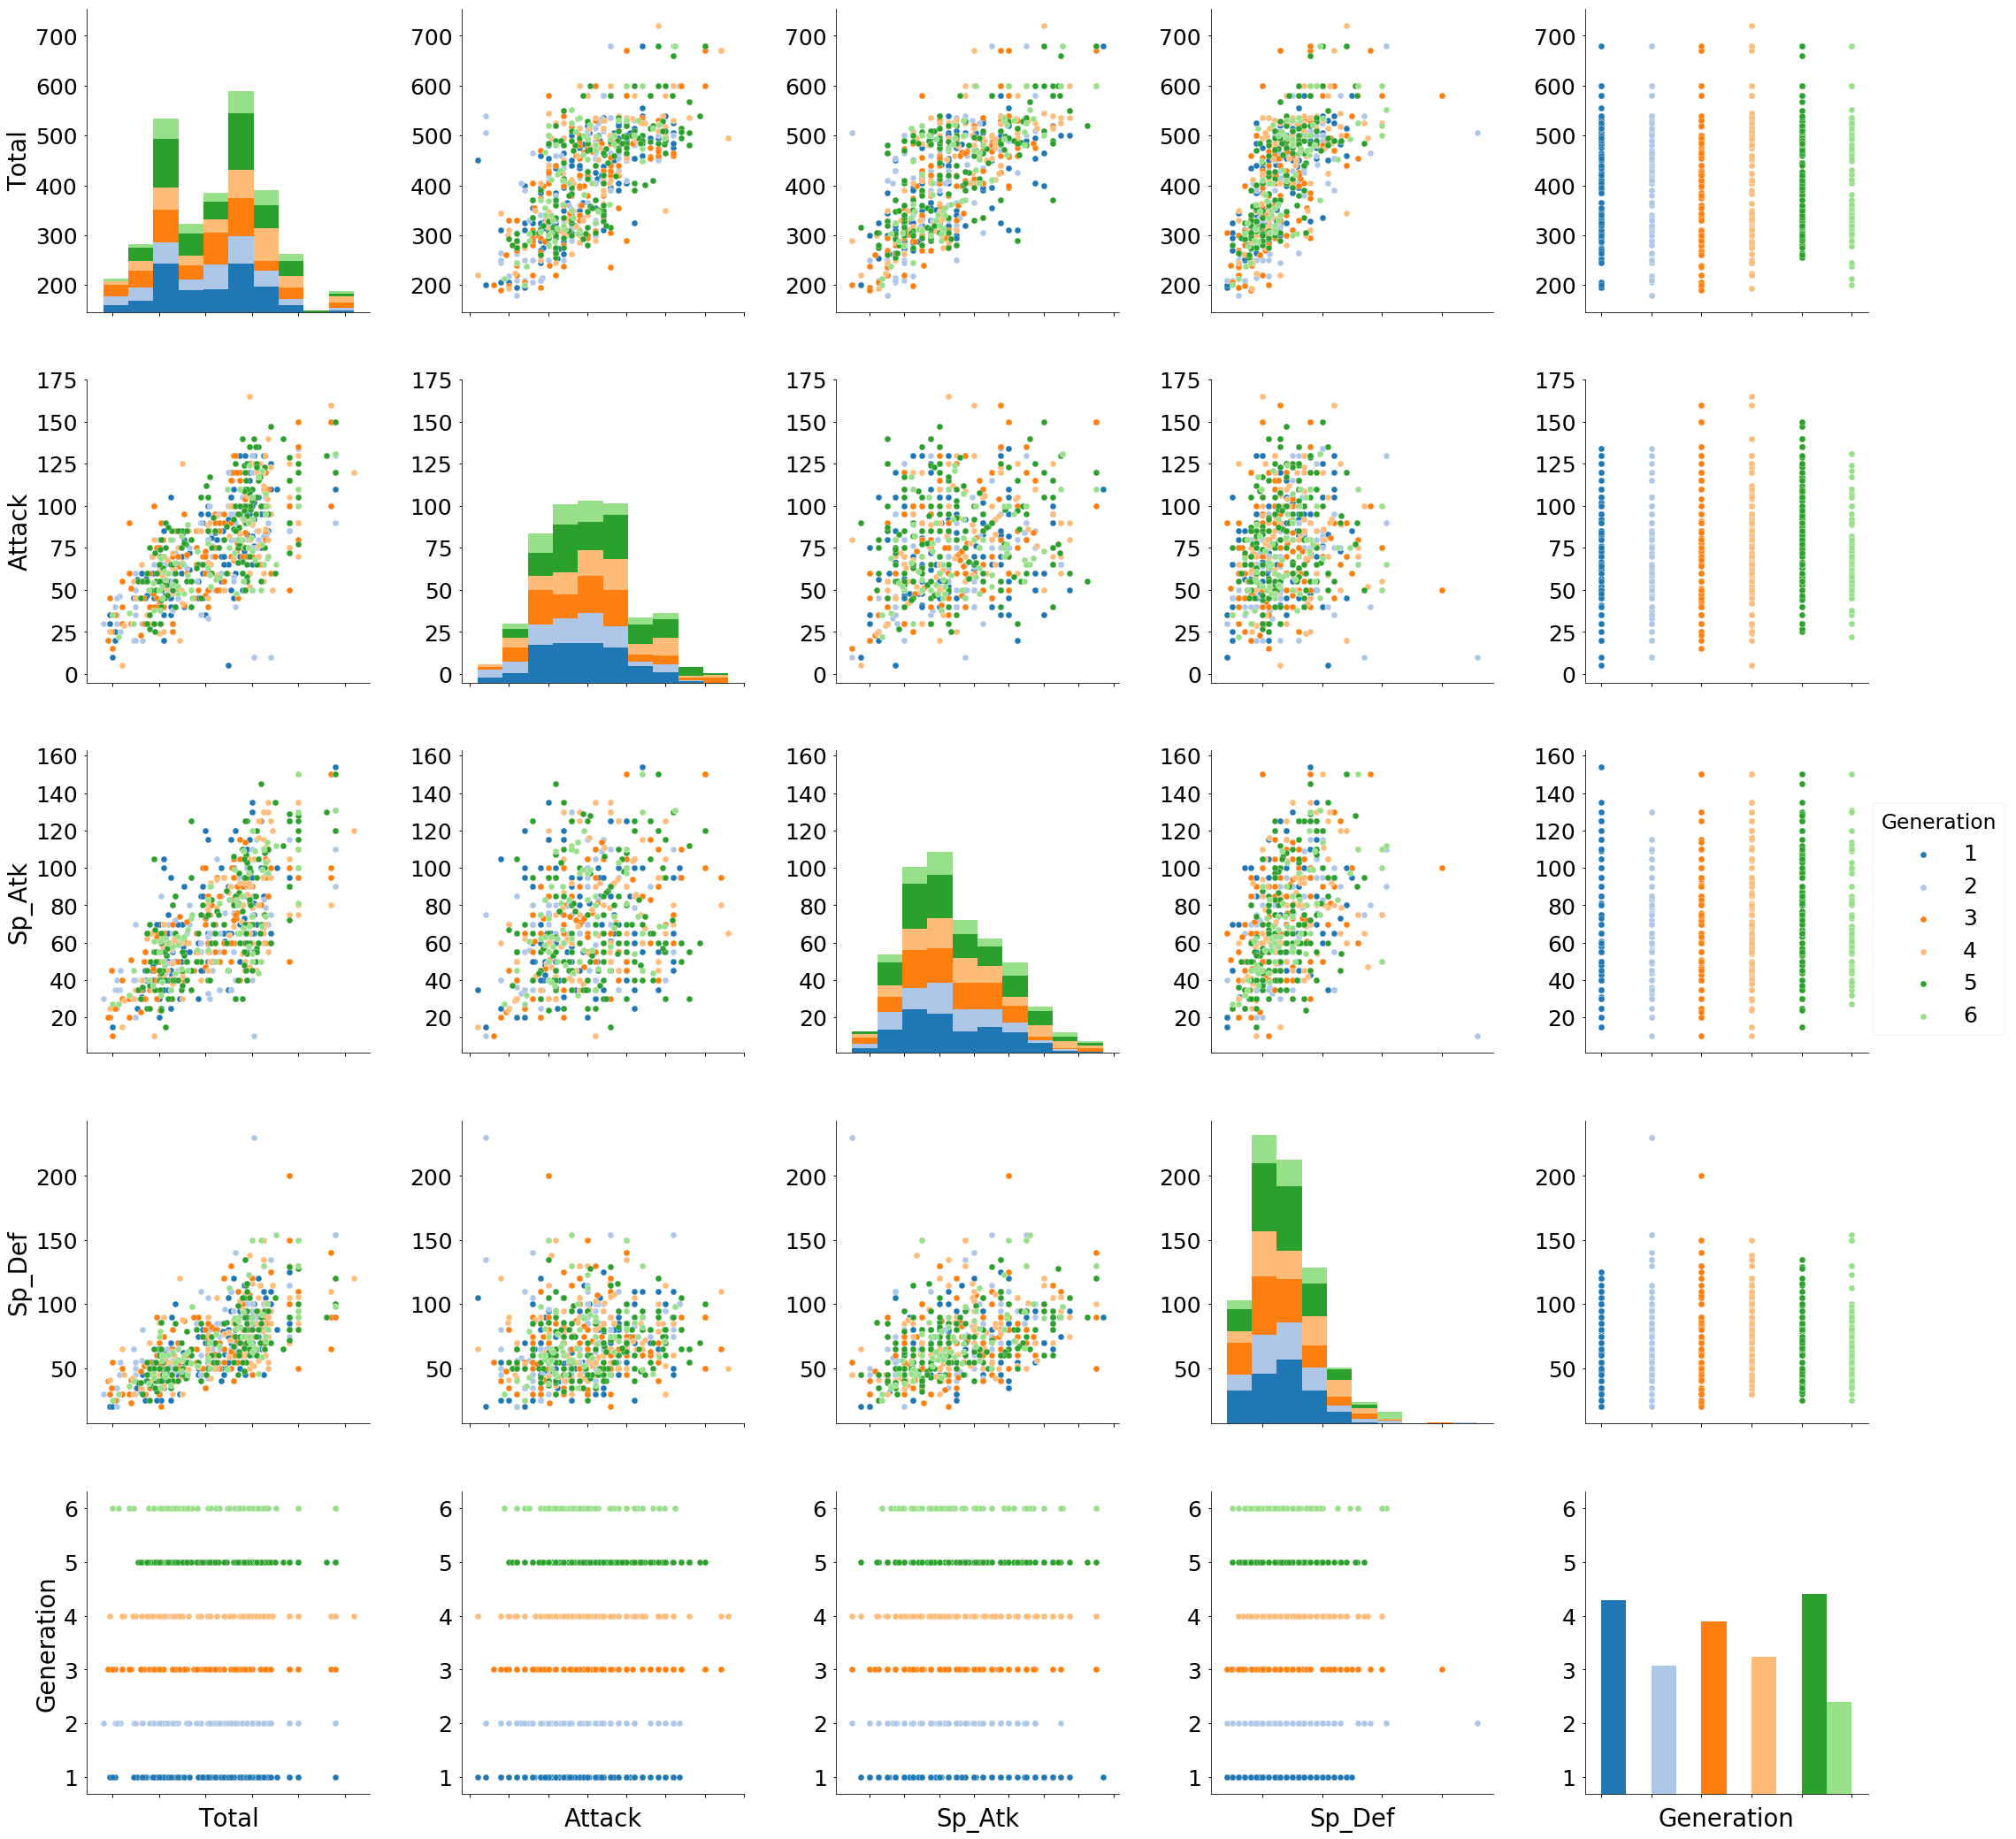

In [23]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df[['Total','Attack','Sp_Atk','Sp_Def','Generation']], 
                 hue='Generation', palette='tab20',size=6)
g.set(xticklabels=[]);

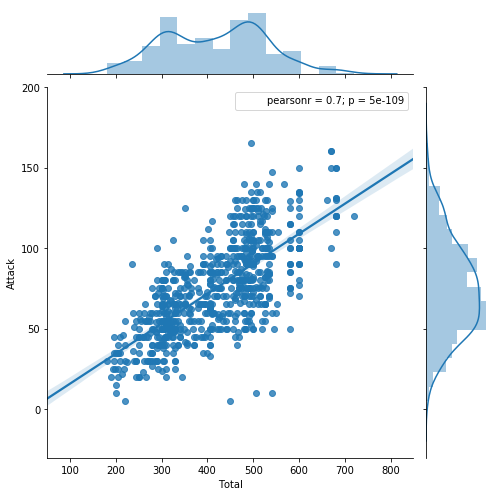

In [24]:
sns.jointplot(x="Total", y="Attack", data=clean_df, kind = 'reg', size = 7)
plt.show()

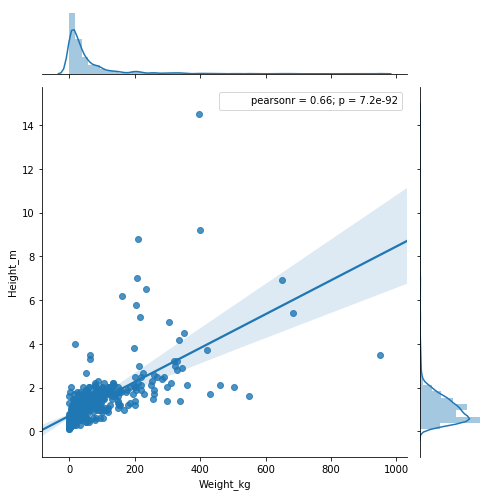

In [25]:
sns.jointplot(x="Weight_kg", y="Height_m", data=clean_df, kind = 'reg', size = 7)
plt.show()

### we want to predict if pokemon is legendary or not


#### independent data: all data beside is legendary
#### dependent data: is legendary

In [26]:
clean_df['isLegendary'].value_counts()

False    675
True      46
Name: isLegendary, dtype: int64

### Split data to train set and test set

In [27]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(clean_df, test_size=0.2, random_state=42)
df_train.shape,df_test.shape, clean_df.shape

((576, 21), (145, 21), (721, 21))

### Convert to array

In [28]:
def get_arrays(df):
    X = np.array(df[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def']])
    y = np.array(df['isLegendary'])
    
    return X, y

X_train, y_train = get_arrays(df_train)
X_test, y_test = get_arrays(df_test)

X_train.shape, y_train.shape

((576, 5), (576,))



### Because we are trying to predict if pokemon is legendary or not, so this is a problem to classify pokemon to two different class.
## LogisticRegression


### Simple pipeline

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

### Train and predict

In [30]:
model = pipeline.fit(X_train, y_train)
model.predict(X_train)[:5]

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([False, False, False, False, False])

### Validate classifier

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, model.predict(X_train))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[532,   6],
       [ 21,  17]])

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

      False       0.96      0.99      0.98       538
       True       0.74      0.45      0.56        38

avg / total       0.95      0.95      0.95       576



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, model.predict(X_train))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.7181080023478772

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def cross_validate_auc(pipeline, X_train, y_train):
    results = cross_val_score(
        pipeline,
        X_train,
        y_train,
        scoring=make_scorer(roc_auc_score),
        cv=10,
    )

    return np.mean(results)
    
cross_validate_auc(pipeline, X_train, y_train)




/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

0.7152603074772886

### Custom transformers

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

class PandasSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, selected_columns):
        self.selected_columns = selected_columns
    
    def fit(self, df, *args):
        return self

    def transform(self, df):
        return np.array(df[self.selected_columns])

In [38]:
pipeline = make_pipeline(
    PandasSelector(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def']),
    StandardScaler(),
    LogisticRegression()
)

model = pipeline.fit(df_train, y_train)
model.predict(df_train)[:5]

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([False, False, False, False, False])

### Complex pipeline

In [39]:
from sklearn.pipeline import make_union

pipeline_stats = make_pipeline(
    PandasSelector(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def']),
    StandardScaler(),
)

pipeline_hasGender = make_pipeline(
    PandasSelector(['hasGender']),
)

pipeline = make_pipeline(
    make_union(
        pipeline_stats,
        pipeline_hasGender,
    ),
    LogisticRegression(),
)

cross_validate_auc(pipeline, df_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

0.855966107617051

### Categorical variables

In [40]:
# before we use OnHotEncoder we need to convert strings to ints

class StringConverter(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.map = {} # column : string : int
    
    def fit(self, X, *args):
        for col in range(X.shape[1]):
            self.map[col] = {}
            idx = 1
            for row in range(X.shape[0]):
                s = X[row, col]
                if s not in self.map[col]:
                    self.map[col][s] = idx
                    idx += 1
        return self

    def transform(self, X):
        X_int = np.zeros(shape=X.shape)
        for col in range(X.shape[1]):
            for row in range(X.shape[0]):
                s = X[row, col]
                X_int[row, col] = self.map[col].get(s, 0)

        return X_int

In [41]:
from sklearn.preprocessing import OneHotEncoder

pipeline_color = make_pipeline(
    PandasSelector(['Color']),
    StringConverter(),
    OneHotEncoder(),
)

pipeline = make_pipeline(
    make_union(
        pipeline_stats,
        pipeline_hasGender,
        pipeline_color,
    ),
    LogisticRegression(),
)

cross_validate_auc(pipeline, df_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

0.8842068483577918

### Text data

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline_name = make_pipeline(
    PandasSelector('Name'),
    TfidfVectorizer(
        analyzer='char',
        ngram_range=(1, 5),
        min_df=10,
    ),
)

pipeline = make_pipeline(
    make_union(
        pipeline_stats,
        pipeline_hasGender,
        pipeline_color,
        pipeline_name,
    ),
    LogisticRegression(),
)

cross_validate_auc(pipeline, df_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

0.880966107617051

### Fine-tuning

In [43]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__class_weight': [None, 'balanced'],
}

grid = GridSearchCV(
    pipeline,
    parameters,
    scoring=make_scorer(roc_auc_score),
).fit(df_train, y_train)

print('Best params: {}'.format(grid.best_params_))
print('Best AUC: {:.3f}'.format(grid.best_score_))

final_model = grid.best_estimator_


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

Best params: {'logisticregression__C': 1, 'logisticregression__class_weight': 'balanced'}
Best AUC: 0.984


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

### Final evaluation

In [44]:
roc_auc_score(y_test, final_model.predict(df_test))


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9265510948905109

# RandomForest


In [45]:
from sklearn.ensemble import RandomForestClassifier

pipeline2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [46]:
model2 = pipeline2.fit(X_train, y_train)
model2.predict(X_train)[:5]

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([False, False,  True,  True, False])

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, model2.predict(X_train))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[536,   2],
       [  2,  36]])

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model2.predict(X_train)))

             precision    recall  f1-score   support

      False       1.00      1.00      1.00       538
       True       0.95      0.95      0.95        38

avg / total       0.99      0.99      0.99       576



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [49]:
roc_auc_score(y_train, model2.predict(X_train))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9718254744668361

In [50]:
cross_validate_auc(pipeline2, X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

0.7300576519916142

In [51]:
pipeline = make_pipeline(
    PandasSelector(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def']),
    StandardScaler(),
    RandomForestClassifier()
)

model = pipeline.fit(df_train, y_train)
model.predict(df_train)[:5]

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([False, False,  True,  True, False])

In [52]:
pipeline_stats = make_pipeline(
    PandasSelector(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def']),
    StandardScaler(),
)

pipeline_hasGender = make_pipeline(
    PandasSelector(['hasGender']),
)

pipeline = make_pipeline(
    make_union(
        pipeline_stats,
        pipeline_hasGender,
    ),
    RandomForestClassifier(),
)

cross_validate_auc(pipeline, df_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

0.8060010482180294

In [53]:
pipeline_color = make_pipeline(
    PandasSelector(['Color']),
    StringConverter(),
    OneHotEncoder(),
)

pipeline = make_pipeline(
    make_union(
        pipeline_stats,
        pipeline_hasGender,
        pipeline_color,
    ),
    RandomForestClassifier(),
)

cross_validate_auc(pipeline, df_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

0.7485936408106221

In [54]:
pipeline_name = make_pipeline(
    PandasSelector('Name'),
    TfidfVectorizer(
        analyzer='char',
        ngram_range=(1, 5),
        min_df=10,
    ),
)

pipeline = make_pipeline(
    make_union(
        pipeline_stats,
        pipeline_hasGender,
        pipeline_color,
        pipeline_name,
    ),
    RandomForestClassifier(),
)

cross_validate_auc(pipeline, df_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

0.6125

In [55]:
# grid search
param_grid = {'n_estimators':[50,150],'random_state': [ 25, 100] }
random_forest2 = RandomForestClassifier()
clf = GridSearchCV(random_forest2, param_grid)
clf = clf.fit(X_train, y_train)
clf.cv_results_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([0.05469068, 0.0508496 , 0.1414446 , 0.14237722]),
 'mean_score_time': array([0.00358136, 0.00256975, 0.00746266, 0.00802247]),
 'mean_test_score': array([0.95833333, 0.95659722, 0.95486111, 0.953125  ]),
 'mean_train_score': array([0.9965255, 0.9965255, 0.9965255, 0.9965255]),
 'param_n_estimators': masked_array(data=[50, 50, 150, 150],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[25, 100, 25, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 50, 'random_state': 25},
  {'n_estimators': 50, 'random_state': 100},
  {'n_estimators': 150, 'random_state': 25},
  {'n_estimators': 150, 'random_state': 100}],
 'rank_test_score': array([1, 2, 3, 4], dtype=int32),
 'split0_test_score': array([0.95336788, 0.94818653, 0.95336788, 0.95336788]),
 'split0_train_score': array([0.99477807, 0.99477

In [56]:
print(clf.best_score_)
print(clf.best_estimator_.get_params())

0.9583333333333334
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': 1, 'oob_score': False, 'random_state': 25, 'verbose': 0, 'warm_start': False}


# Summary

The best score using random forest is 0.9583333333333334, and the best score using logistic regression is 0.984.

In this work a statistical analysis of the Pokémon as they appear in the RGBs have been carried out. We have
carried out univariate analysis for all the variables in the dataset that we have previously built. We have analyzed
how the numerical variables are distributed, and all of them have shown to have a gaussian behavior.

finally, we try to predict whether a Pokémon is legendary or not, which has worked quite well, probably because its
inputs have been the most meaningful variables that were possible